In [12]:
import numpy as np # used for working on array
import matplotlib.pyplot as plt # used for ploting figures
from matplotlib.patches import Ellipse # used to create ellipse
import seaborn as sns # used for plotting figures
import pandas as pd # used for working with dataframes
import random # used to creating random numbers

from sklearn.metrics import roc_auc_score as AUC

In [13]:
########## Training Distribution ###############
nTr_Class1=100
nTr_Class2=100

nTs_Class1=100
nTs_Class2=100

### 1-D Data

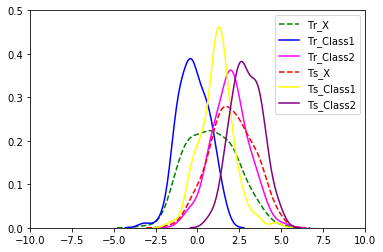

In [9]:
##### X for Class 1
Tr_mu1 = 0 # mean 
Tr_sigma1 =  1 # standard deviation
Tr_s1 = np.random.normal(Tr_mu1, Tr_sigma1, nTr_Class1)

##### X for Class 2
Tr_mu2 = 2 # mean 
Tr_sigma2 =  1 # standard deviation
Tr_s2 = np.random.normal(Tr_mu2, Tr_sigma2, nTr_Class2)

Tr_X=np.append(Tr_s1,Tr_s2) # Append data into training distrbution

##### Y Groud Truth (Labels)

zz=np.zeros((nTr_Class1,1), dtype=int)
on=np.ones((nTr_Class2,1), dtype=int)
Tr_Y=np.concatenate((zz,on), axis=0) 

########## Testing Distribution ###############

##### Class 1
Ts_mu1 = 1 # mean 
Ts_sigma1 =  1 # standard deviation
Ts_s1 = np.random.normal(Ts_mu1, Ts_sigma1, 100)

##### Class 2
Ts_mu2 = 3 # mean 
Ts_sigma2 =  1 # standard deviation
Ts_s2 = np.random.normal(Ts_mu2, Ts_sigma2, 100)

Ts_X=np.append(Ts_s1,Ts_s2) # Append data into testing distrbution

##### Y Groud Truth (Labels)

zz=np.zeros((nTs_Class1,1), dtype=int)
on=np.ones((nTs_Class2,1), dtype=int)
Ts_Y=np.concatenate((zz,on), axis=0) 

Tr_X = pd.DataFrame(Tr_X) # Convert to Dataframe (Training)
Ts_X = pd.DataFrame(Ts_X) # Convert to Dataframe (Testing)

########## Plot Both Distributions ###############

# Training
sns.distplot(Tr_X , color="green", label="Tr_X", hist=False, kde_kws={'linestyle':'--'})
sns.distplot(Tr_s1 , color="blue", label="Tr_Class1", hist=False)
sns.distplot(Tr_s2 , color="magenta", label="Tr_Class2",hist=False)

# Training
sns.distplot(Ts_X , color="red", label="Ts_X", hist=False, kde_kws={'linestyle':'--'})
sns.distplot(Ts_s1 , color="yellow", label="Ts_Class1", hist=False)
sns.distplot(Ts_s2 , color="purple", label="Ts_Class2",hist=False)

plt.ylim(0,0.50)
plt.xlim(-10, 10)
plt.legend();
plt.show()

#print(Tr_X)
#print(Ts_X)
#print(Tr_Y)
#print(Ts_Y)

### 2-D Data

In [14]:
# This function is used to create an ellipse with covariance matrix, centre, and nstd. 

def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """
    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

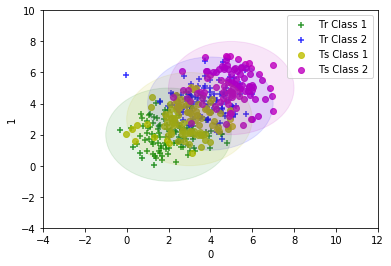

In [18]:
##########  Training ########## 
Tr_Mu1 = [2,2]
Tr_Cov1 = np.eye(2)
Tr_d1 = np.random.multivariate_normal(Tr_Mu1, Tr_Cov1, nTr_Class1)

Tr_Mu2 = [4,4]
Tr_Cov2 = np.eye(2)
Tr_d2 = np.random.multivariate_normal(Tr_Mu2, Tr_Cov2, nTr_Class2)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)

##### Y Groud Truth (Labels)

zz=np.zeros((nTr_Class1,1), dtype=int)
on=np.ones((nTr_Class2,1), dtype=int)
Tr_Y=np.concatenate((zz,on), axis=0) 

##########  Testing ########## 
Ts_Mu1 = [3,3]
Ts_Cov1 = np.eye(2)
Ts_d1 = np.random.multivariate_normal(Ts_Mu1, Ts_Cov1, nTs_Class1)

Ts_Mu2 = [5,5]
Ts_Cov2 = np.eye(2)
Ts_d2 = np.random.multivariate_normal(Ts_Mu2, Ts_Cov2, nTs_Class2)

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0)
Ts_X=pd.DataFrame(Ts_X_array)

##### Y Groud Truth (Labels)

zz=np.zeros((nTs_Class1,1), dtype=int)
on=np.ones((nTs_Class2,1), dtype=int)
Ts_Y=np.concatenate((zz,on), axis=0) 


########## Plot ########## 

# use the function regplot to make a scatterplot
ax1=sns.regplot(x=Tr_X.iloc[0:100,0], y=Tr_X.iloc[0:100,1], marker="+", fit_reg=False, color="g", label="Tr Class 1")
e1 = get_cov_ellipse(Tr_Cov1, Tr_Mu1, 3,color="g", alpha=0.1)
ax1.add_artist(e1)

ax2=sns.regplot(x=Tr_X.iloc[101:200,0], y=Tr_X.iloc[101:200,1],  marker="+", fit_reg=False, color="b", label="Tr Class 2")
e2 = get_cov_ellipse(Tr_Cov2, Tr_Mu2, 3, color="b", alpha=0.1)
ax2.add_artist(e2)

# use the function regplot to make a scatterplot
ax3=sns.regplot(x=Ts_X.iloc[0:100,0], y=Ts_X.iloc[0:100,1],fit_reg=False, color="y", marker="o", label="Ts Class 1")
e3 = get_cov_ellipse(Ts_Cov1, Ts_Mu1, 3, color="y", alpha=0.1)
ax3.add_artist(e3)

ax4=sns.regplot(x=Ts_X.iloc[101:200,0], y=Ts_X.iloc[101:200,1],fit_reg=False, color="m", marker="o", label="Ts Class 2")
e4 = get_cov_ellipse(Ts_Cov2, Ts_Mu2, 3,color="m", alpha=0.1)
ax4.add_artist(e4)

plt.ylim(-4,10)
plt.xlim(-4, 12)
plt.legend()
plt.show()

In [19]:
from sklearn import svm
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(Tr_X,Tr_Y)


C:\Users\hr17576\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
from sklearn import metrics
Y_hat=clf.predict(Ts_X)
metrics.accuracy_score(Y_hat, Ts_Y)

0.755